## Gather: 

Data will be gathered from three resources:

1) The twitter_archive_enhanced.csv- file was provided 
2) The tweet image predictions, i.e., what breed of dog- file was provided 
3) Twitter API and Python's Tweepy library

In [3]:
# Import statements
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import tweepy

from datetime import datetime
from functools import reduce

% matplotlib inline

In [4]:
twitter1 = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [6]:
images = pd.read_csv('image_predictions.tsv', sep = '\t')


In [7]:
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
tweet_ids = list(twitter1['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817401858
815966073409433600
815745968457060357
815736392542261248
815639385530101762
815390420867969024
814986499976527872
814638523311

762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950

707776935007539200
707741517457260545
707738799544082433
707693576495472641
707629649552134146
707610948723478529
707420581654872064
707411934438625280
707387676719185920
707377100785885184
707315916783140866
707297311098011648
707059547140169728
707038192327901184
707021089608753152
707014260413456384
706904523814649856
706901761596989440
706681918348251136
706644897839910912
706593038911545345
706538006853918722
706516534877929472
706346369204748288
706310011488698368
706291001778950144
706265994973601792
706169069255446529
706166467411222528
706153300320784384
705975130514706432
705970349788291072
705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924

679862121895714818
679854723806179328
679844490799091713
679828447187857408
679777920601223168
679736210798047232
679729593985699840
679722016581222400
679530280114372609
679527802031484928
679511351870550016
679503373272485890
679475951516934144
679462823135686656
679405845277462528
679158373988876288
679148763231985668
679132435750195208
679111216690831360
679062614270468097
679047485189439488
679001094530465792
678991772295516161
678969228704284672
678800283649069056
678798276842360832
678774928607469569
678767140346941444
678764513869611008
678755239630127104
678740035362037760
678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548

669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781868544
669203728096960512
669037058363662336
669015743032369152
669006782128353280
669000397445533696
668994913074286592
668992363537309700
668989615043424256
668988183816871936
668986018524233728
668981893510119424
668979806671884288
668975677807423489
668967877119254528
668960084974809088
668955713004314625
668932921458302977
668902994700836864
668892474547511297
668872652652679168
668852170888998912
668826086256599040
668815180734689280
668779399630725120
668655139528511488
668645506898350081
668643542311546881
668641109086707712
668636665813057536
668633411083464705
668631377374486528
668627278264475648
668625577880875008
668623201287675904
668620235289837568
668614819948453888
668587383441514497
668567822092

In [9]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [10]:
# Load the Twitter API data
twitter2 = pd.read_json('tweet_json.txt')
twitter2['tweet_id'] = tweet_id_success
twitter2 = twitter2[['tweet_id']]

# Assess Section: 

In [11]:
twitter1.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
1828,676263575653122048,NaN,NaN,2015-12-14 04:52:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All this pupper wanted to do was go skiing. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676263575...,10,10,None,None,None,pupper,None
1750,679001094530465792,NaN,NaN,2015-12-21 18:10:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,NaN,NaN,NaN,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None


In [12]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter1['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [14]:
twitter1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
twitter1['text'].value_counts()

Here's a h*ckin peaceful boy. Unbothered by the comings and goings. 13/10 please reveal your wise ways https://t.co/yeaH8Ej5eM                                          1
This is Oreo. She's a photographer and a model. Living a double pupple life. 12/10 such talent much cute would pet https://t.co/zNeLxJeAoL                              1
We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU                             1
This is Larry. He has no self control. Tongue still nifty af tho 11/10 https://t.co/ghyT4Ubk1r                                                                          1
This is Bentley. He got stuck on his 3rd homework problem. Picturing the best case scenario if he drops out. 10/10 https://t.co/7rS33sCKMS                              1
This is Curtis. He's an Albino Haberdasher. Terrified of dandelions. They really spook him up. 10/10 it'll be ok pup https://t.co/s8YcfZrWhK          

In [16]:
twitter1['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [17]:
twitter1['retweeted_status_user_id'].value_counts()


4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [18]:
twitter1['retweeted_status_timestamp'].value_counts()

2016-05-16 00:31:53 +0000    1
2016-08-08 17:19:51 +0000    1
2016-03-01 20:11:59 +0000    1
2016-09-26 17:55:00 +0000    1
2017-02-08 17:00:26 +0000    1
2017-02-16 23:23:38 +0000    1
2016-12-17 00:38:52 +0000    1
2017-04-20 18:14:33 +0000    1
2017-01-07 20:18:46 +0000    1
2017-02-12 01:04:29 +0000    1
2016-09-13 16:30:07 +0000    1
2015-12-21 22:15:18 +0000    1
2016-09-14 17:40:06 +0000    1
2017-06-23 16:00:04 +0000    1
2015-12-30 06:37:25 +0000    1
2016-04-29 00:21:01 +0000    1
2016-08-31 15:10:07 +0000    1
2015-11-20 03:41:59 +0000    1
2016-10-13 23:23:56 +0000    1
2016-03-21 19:29:52 +0000    1
2016-05-28 03:04:00 +0000    1
2017-02-09 01:27:41 +0000    1
2016-06-08 22:48:46 +0000    1
2017-05-27 19:39:34 +0000    1
2016-09-07 15:44:53 +0000    1
2017-01-15 21:49:15 +0000    1
2016-01-25 00:26:41 +0000    1
2016-08-22 16:06:54 +0000    1
2016-09-19 01:42:24 +0000    1
2016-01-06 20:16:44 +0000    1
                            ..
2016-07-12 18:27:35 +0000    1
2016-02-

In [18]:
twitter1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
twitter1['name'].value_counts()


None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Buddy          7
Daisy          7
Toby           7
Bailey         7
Bella          6
Stanley        6
Dave           6
Koda           6
Milo           6
Jax            6
Oscar          6
Scout          6
Rusty          6
Leo            6
Jack           6
Gus            5
            ... 
Bruno          1
Pippin         1
Lenox          1
Carper         1
Bobb           1
Ashleigh       1
Acro           1
Harvey         1
Baron          1
Heinrich       1
Damon          1
Covach         1
Miley          1
Stephanus      1
Genevieve      1
Lorelei        1
Traviss        1
Rascal         1
Link           1
Jordy          1
Timmy          1
Samsom         1
Rooney         1
Mark           1
Rodney         1
Dot            1
Julius         1
Chaz          

In [20]:
twitter1['expanded_urls'].value_counts()

https://www.gofundme.com/servicedogoliver,https://twitter.com/dog_rates/status/819952236453363712/photo/1                                                                                                                                                          2
https://twitter.com/dog_rates/status/816450570814898180/photo/1,https://twitter.com/dog_rates/status/816450570814898180/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/753375668877008896/photo/1                                                                                                                                                                                                    2
https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                            

In [21]:
twitter1['doggo'].value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
twitter1['floofer'].value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
twitter1['pupper'].value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
twitter1['puppo'].value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
twitter1.loc[twitter1['name'].str.isupper()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [26]:
images.sample(5)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1679,813217897535406080,https://pbs.twimg.com/media/C0khWkVXEAI389B.jpg,1,Samoyed,0.905972,True,Pomeranian,0.048038,True,West_Highland_white_terrier,0.035667,True
373,672988786805112832,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,1,Lakeland_terrier,0.836632,True,West_Highland_white_terrier,0.073900,True,wire-haired_fox_terrier,0.038160,True
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
1817,834086379323871233,https://pbs.twimg.com/media/C5NFIsjWQAEI93t.jpg,1,bath_towel,0.736759,False,sleeping_bag,0.062959,False,Labrador_retriever,0.045263,True


In [27]:
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg')
# This is an image for tweet_id 745057283344719872

In [28]:
twitter1.loc[twitter1['name'].str.isupper()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [29]:
images['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

# Clean Section: 

In [ ]:
# Define: 
    
    Issue:  twitter2 and images data should be combined with the twitter1 data since they are information about the same tweet
        Solution: Merge the 3 datasets together on 'tweet_id' 

Code

In [30]:
twitter1_clean = twitter1.copy()
twitter2_clean = twitter2.copy()
images_clean = images.copy()

In [31]:
# Merge the twitter1, twitter2, and images dataframes on 'tweet_id'
dfs = [twitter1_clean, twitter2_clean, images_clean]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

Test: 

In [32]:
twitter1.head(2)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [33]:
twitter1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

 Issue: variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)
Solution: Extract the dog stages from the 'text' column into the new 'dog_stage' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns.

Code: 

In [34]:
twitter1['dog_stage'] = twitter1['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [35]:
twitter1[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)


,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [36]:
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


Test: 

In [37]:
twitter.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 24 columns):
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     0 non-null object
source                        0 non-null object
text                          0 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 0 non-null object
rating_numerator              0 non-null int64
rating_denominator            0 non-null int64
name                          0 non-null object
tweet_id                      0 non-null int64
jpg_url                       0 non-null object
img_num                       0 non-null int64
p1                            0 non-null object
p1_conf                       0 non-null float64
p1_dog                        0 non-null bool
p2                            0 non-null object
p

Remove Retweets 

Code: 

In [38]:
twitter1 = twitter1.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

In [ ]:
Test: 

In [39]:
twitter1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dog_stage                399 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 276.2+ KB


Tweet ID is an interger 

Code: 

In [40]:

lowercase_names = []
for row in twitter1['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


Name of dogs issue: 

    
name has values that are the string "None" instead of NaN
some names are inaccurate such as "a", "an", "the", "very", "by", etc. 
I also found an instand of a name being "O" instead of "O'Malley"

Code: 

In [41]:
# Replace all names that start with a lowercase letter with a NaN
twitter1['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter1['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter1['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

Test: 

In [42]:
twitter1['name'].value_counts()


Charlie      12
Lucy         11
Cooper       11
Oliver       11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
Toby          7
Daisy         7
Bailey        7
Buddy         7
Milo          6
Dave          6
Bella         6
Stanley       6
Jack          6
Oscar         6
Jax           6
Leo           6
Koda          6
Rusty         6
Scout         6
Sunny         5
Larry         5
George        5
Louis         5
Gus           5
             ..
Lenox         1
Carper        1
Bobb          1
Kobe          1
Todo          1
Jennifur      1
Storkson      1
Jeremy        1
Ashleigh      1
Chevy         1
Covach        1
Miley         1
Stephanus     1
Genevieve     1
Lorelei       1
Traviss       1
Rascal        1
Baron         1
Link          1
Timmy         1
Samsom        1
Rooney        1
Mark          1
Rodney        1
Dot           1
Julius        1
Chaz          1
Jordy         1
Acro          1
Kawhi         1
Name: name, Length: 931,

Ratings Issue: 
    
    Code: 

In [43]:

ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter1['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [44]:
ratings_with_decimals_index

[45, 340, 695, 763, 1689, 1712]

In [45]:
twitter1.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter1.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter1.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter1.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

Test: 

In [46]:
twitter1.loc[340]


tweet_id                                                832215909146226688
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2017-02-16 13:11:49 +0000
source                   <a href="http://twitter.com/download/iphone" r...
text                     RT @dog_rates: This is Logan, the Chow who liv...
expanded_urls            https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                      9.75
rating_denominator                                                      10
name                                                                 Logan
doggo                                                                 None
floofer                                                               None
pupper                                                                None
puppo                    

Non-standard Ratings & unneeded colomns: 
    
    Code

In [47]:
twitter1['rating'] = twitter1['rating_numerator'] / twitter1['rating_denominator']


In [48]:
twitter1.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage', 'rating'],
      dtype='object')

In [49]:
# Change some column names so they are shorter
twitter1.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)

# Drop undesired columns to make dataframe easier to view
twitter1.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'dog_stage'], axis=1, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None)

Test: 

In [50]:
twitter1.head()

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,1.2


# ANALYZE  Section: 

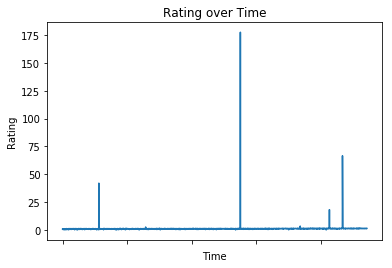

In [54]:
twitter1.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.show;

In [56]:
twitter1.loc[twitter1['rating'] > 2]

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,doggo,floofer,pupper,puppo,rating
188,855862651834028034,2017-04-22 19:15:32 +0000,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420.0,10,NaN,None,None,None,None,42.000000
189,855860136149123072,2017-04-22 19:05:32 +0000,@s8n You tried very hard to portray this good ...,NaN,666.0,10,NaN,None,None,None,None,66.600000
290,838150277551247360,2017-03-04 22:12:52 +0000,@markhoppus 182/10,NaN,182.0,10,NaN,None,None,None,None,18.200000
313,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960.0,0,NaN,None,None,None,None,inf
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,None,None,None,None,3.428571
979,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,None,None,None,177.600000
1712,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10,NaN,None,None,None,None,2.600000
2074,670842764863651840,2015-11-29 05:52:33 +0000,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,None,None,None,None,42.000000


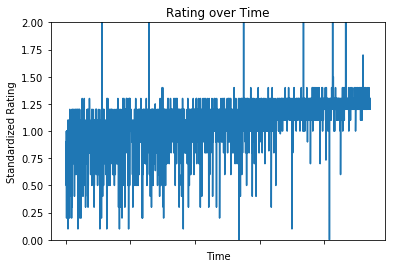

In [58]:
twitter1.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

In [2]:
df_twitter1.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

NameError: name 'df_twitter' is not defined

Sources: 

For this project i relied heavily on github and numerous sources that i found on the internet. A few of the sources i used are: 


https://github.com/latinacode/Wrangle-and-Analyze-Data

https://github.com/ursulahneumann/Wrangle-and-Analyze-Data

https://github.com/chelseymarie6/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb

https://github.com/stefan-cornelissen/Wrangle-and-Analyze-Data-Udacity-Project

https://github.com/yagmurdalman/wrangle-and-analyze-data

https://github.com/Abhishek20182/Wrangle-and-Analyze-Data

https://github.com/StefaniePowazny/Wrangle-and-Analyze-Data

Udacity.com 

Stackoverflow.com 

Youtube.com- there is a full project walkthrough here 



Conclusions: 

1) The ratings, retweets and favorites are not only related with the dog images or videos, the humor of the account holder also affects the followers’ decisions.
2) Image prediction algorithm is not always successful to detect the dog breed. Sometimes it detects another object in the picture rather than the dog, like a bird. 
3) Some tweets rate other things rather than dogs, I cleaned a significant amount of data but it was not that easy to clean all of them, that is why there are still very low ratings.
4) I performed 9 data clean sections: 

1) Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
tweet_id is an integer
2) timestamp and retweeted_status_timestamp are currently of type 'object'
3) source is in HTML format with a and \a tags surrounding the text
4) name has values that are the string "None" instead of NaN
5) some names are inaccurate such as "a", "an", "the", "very", "by", etc.  which leads to some inaccuracies.
6) Found an instance of a name being "O" instead of "O'Malley"
7) doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN
8) there are ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly extracted as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27). There are instances of 1/2 and 50/50 which are not ratings such signifying "half" which have been considered as ratings. Finally, use of 4/20 and 24/7 has been confused as ratings.
9) There are many columns in this dataframe making it hard to read, and some will not be needed for analysis

    
    